In [7]:
%matplotlib inline
from IPython.core.pylabtools import figsize

import numpy as np
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi']=300
colors=['#348ABD', '#A60628']

Our neighboar told us about hits friend Tom, that hi likes to have tools in place. Is Tom - librarian or farmer?

We might might think that Tom is librarian - but we need to take into account that there 20 times more farmers then librarians.

By statistics hi most likly Tom is farmer.

Let _A_ - is an event that Tom is librarian and we know nothing about him.

\begin{align}
\rm{P}(A) = 1/21=0.047
\end{align}

That is our apostorior knowladge about Tom.
What we want to know is P(A|X) - probability of Tom being the librarian.

Let's remind our self Bayes' Theorem


\begin{align}
\rm{P}(A|X) = \frac{P(X|A)P(A)}{P(X)}
\end{align}

**P(A|X)** - Is probability that Tom is librarien _given_ that hi likes to have tools in place.

We know probability P(A). 

What **P(X|A)** - that means - what is probability that hi likes to have tools in place _given_ Tim is Librarien? let's assume it's 0.95

**P(X)** - probability of some random person can be described same as Tam

To estimate P(X) we need to break it down
\begin{align}
\rm{P}(X) = P(X \cap A) + P(X \cap \overline{A}) =\\
P(X|A)P(A)+P(X|\overline{A})P(\overline{A})
\end{align}

F.Y.I
\begin{align}
\rm{P}(A|B) = \rm{P}(A\cap B)/\rm{P}(B)
\end{align}

\begin{align}
\rm{P}(\overline{A})=1-P(A)=20/21=0.952381
\end{align}

Last unknown part is P(X|~A) - proability that neighbor will describe person as X gine hi is farmer. We can Assume here it 0.5
\begin{align}
\rm{P}(X|\overline{A})=0.5
\end{align}

\begin{align}
\rm{P}(X) =0.95\times(1/21) + (0.5)\times(20/21)=0.52
\end{align}


\begin{align}
\rm{P}(A|X) = \frac{0.95\times1/20}{0.52}=0.087
\end{align}

Befoure we thoght that Tom had 0.047 chance to be librarian, after our neighbour described Tom his probability doubled till 0.087

In [2]:
def calc_random_person_likes_tools_inplace(p_X_Tom_librarian=0.95,\
                                 p_X_Tom_farmer=0.5,\
                                 proportion_farmers=20):
    """
    P(X) - probability of some random person can be described same as Tam
    """
    return p_X_Tom_librarian * (1/(proportion_farmers+1)) + \
            p_X_Tom_farmer * ((proportion_farmers)/(proportion_farmers+1))

# test
assert np.abs((calc_random_person_likes_tools_inplace(0.95, 0.5, 20)-0.5214)) <0.0001

def calc_tom_is_librarian(p_X_Tom_librarian, p_X_Tom_farmer, proportion_farmers):
    u=calc_random_person_likes_tools_inplace(p_X_Tom_librarian, p_X_Tom_farmer, proportion_farmers)
    return (p_X_Tom_librarian*(1/(proportion_farmers+1)))/u

assert np.abs(calc_tom_is_librarian(0.95, 0.5, 20) - 0.0867) < 0.0001

In [3]:
p_X_Tom_librarian=0.95
p_X_Tom_farmer=0.5
proportion_farmers=20

prior_A=1/proportion_farmers
prior_not_A=1-prior_A
posterior_A_X=calc_tom_is_librarian(p_X_Tom_librarian, p_X_Tom_farmer, proportion_farmers)
posterior_not_A_X=1-posterior_A_X

In [4]:
def plot_librarian(prior_A, prior_not_A, posterior_A_X, posterior_not_A_X):
    plt.bar([0, 0.7], [prior_A, prior_not_A], width=0.25, 
       color=colors[0], label="Prior distribution",
       lw=3, edgecolor="#348ABD")

    plt.bar([0+0.25, 0.7+0.25], [posterior_A_X, posterior_not_A_X], width=0.25, 
           color=colors[1], label="Posterior distribution",
           lw=3, edgecolor="#A60628")
    plt.xticks([0.115, 0.815], ["Librarian", "Farmer"])

    plt.title("Prior and postitior probabilities of Toms profession")
    plt.ylabel("Probability")
    plt.legend(loc="upper left")

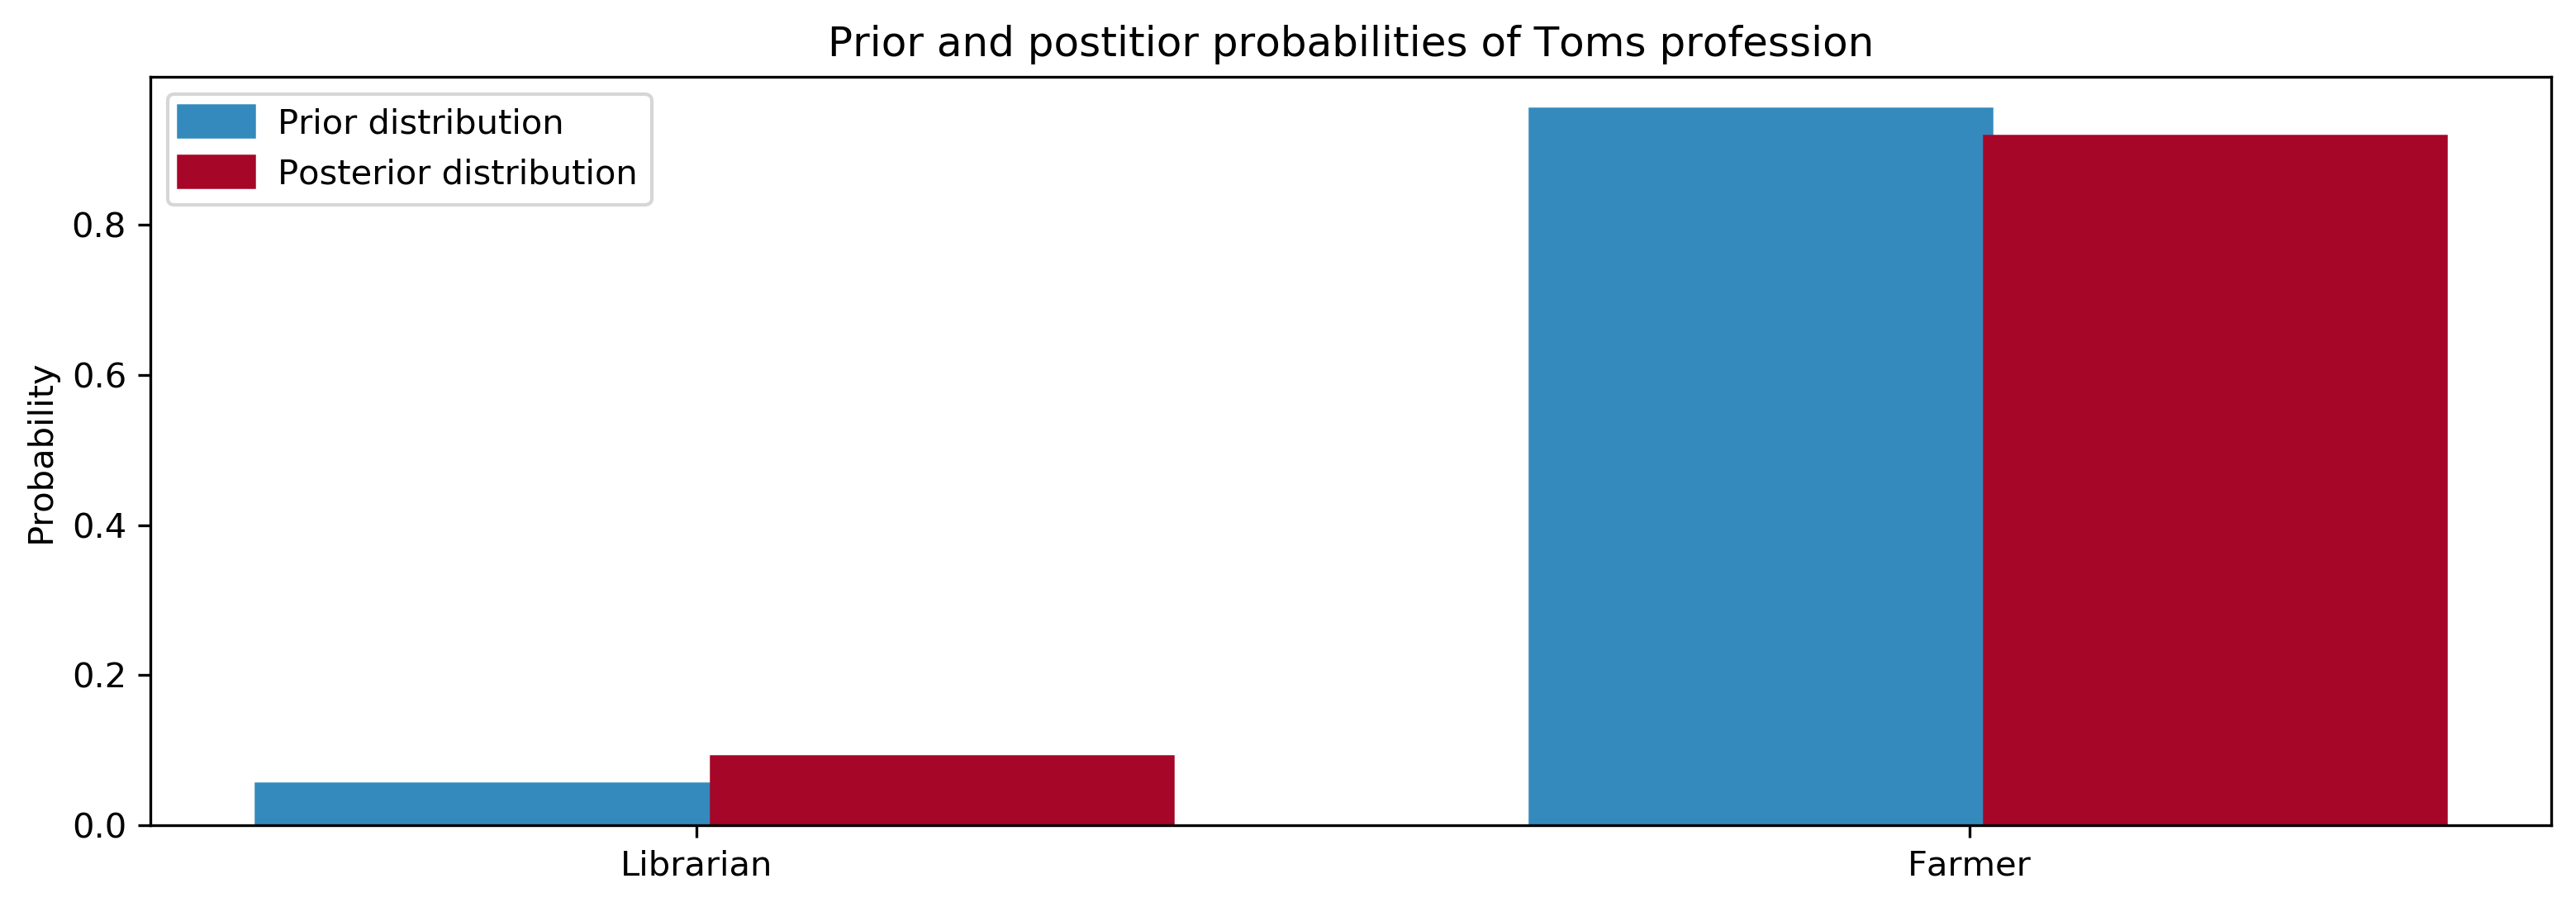

In [8]:
plot_librarian(prior_A, prior_not_A, posterior_A_X, posterior_not_A_X)

Interesting what would happend with Toms profession if we change somethig,

Probability neighbour will describe him as `person who likes his tools in place` woube much lower _give_ that tom is Farmer, because that nightbor does not belive in that farmers can keep thir tool in place and it's unlikly for him. But hi would will be 0.99999 sure describe him like X given Time is Librarian

\begin{align}
\rm{P(X|\overline{A})=0.1}\\
\rm{P(X|A)=0.9999}
\end{align}

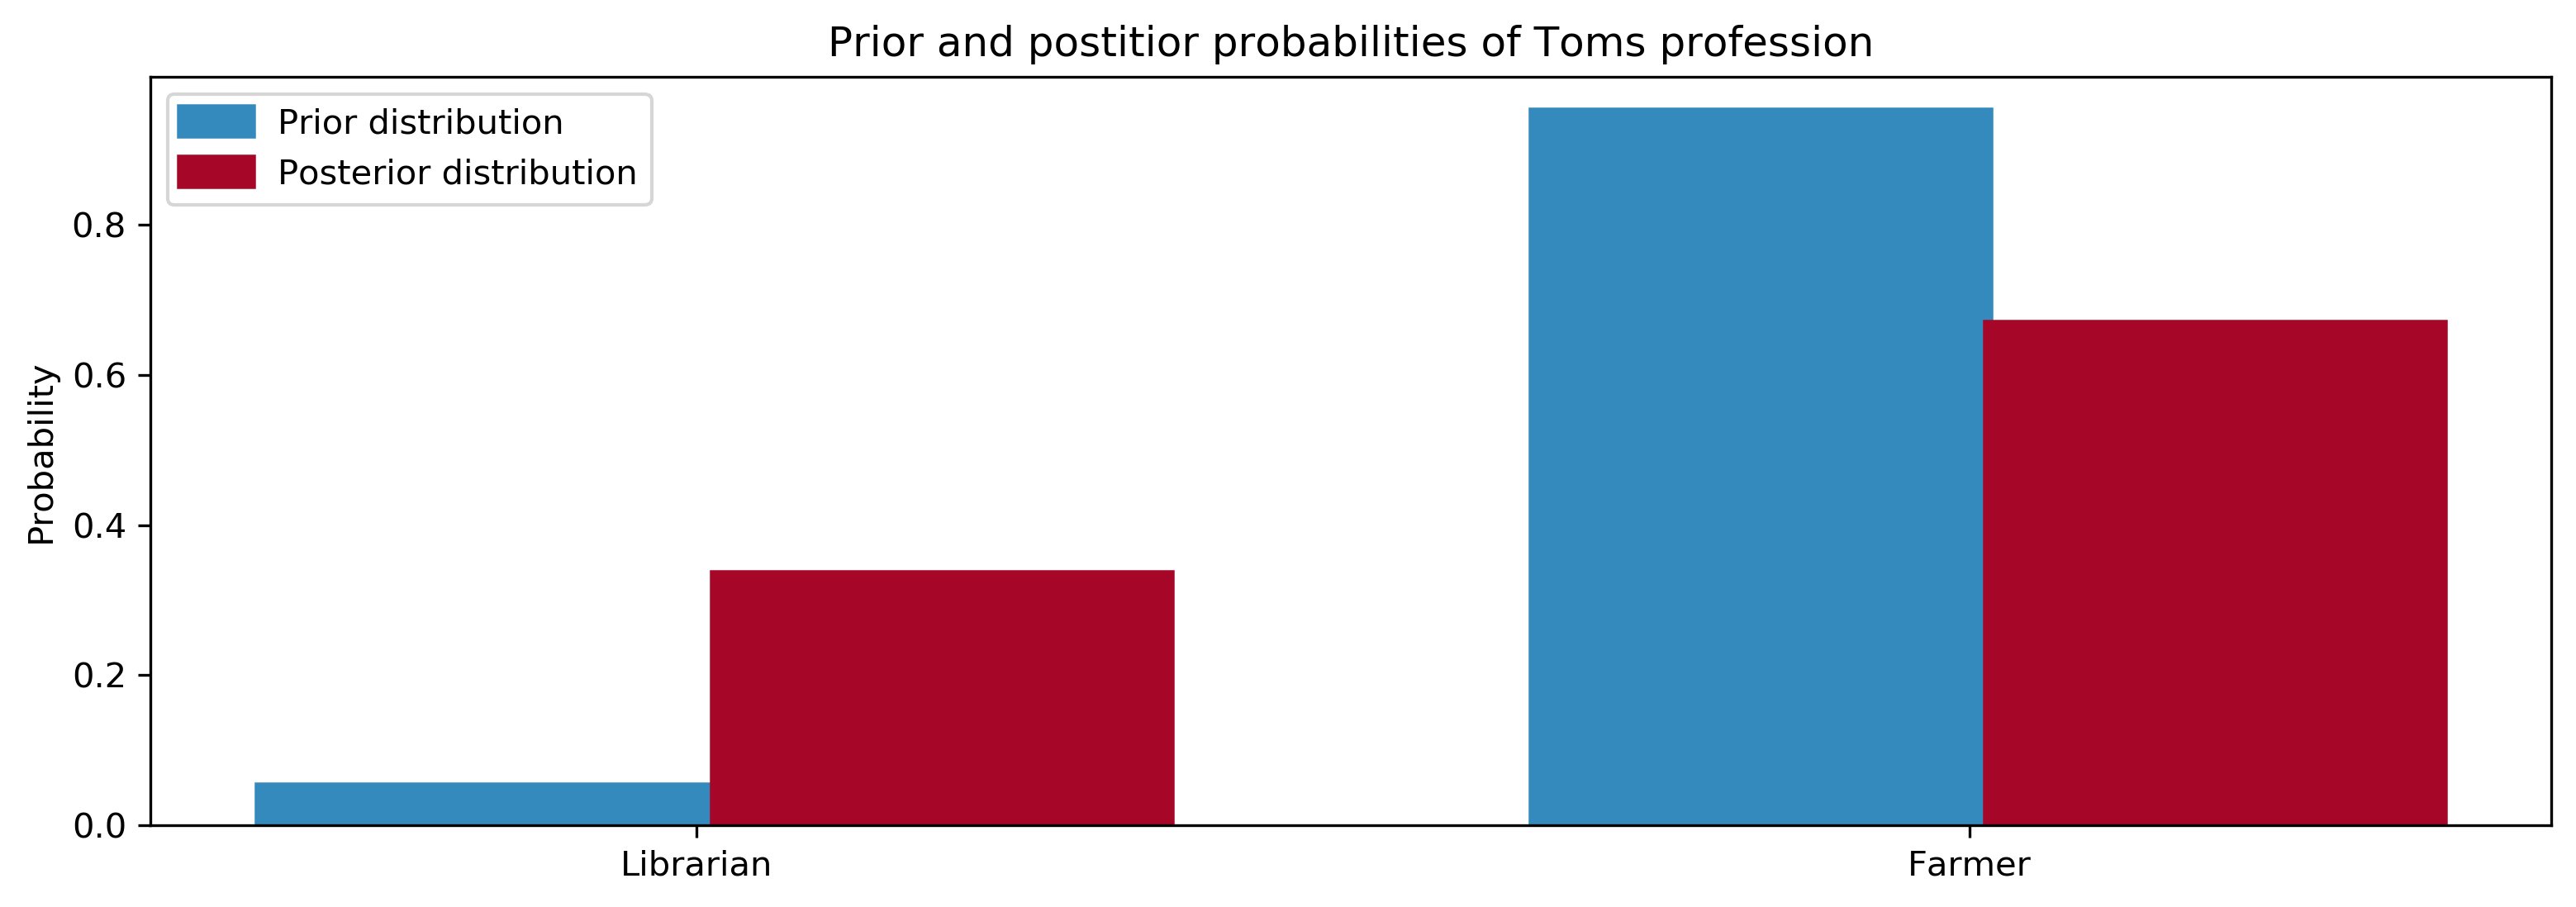

In [103]:
p_X_Tom_librarian=0.9999
p_X_Tom_farmer=0.1
proportion_farmers=20

prior_A=1/proportion_farmers
prior_not_A=1-prior_A
posterior_A_X=calc_tom_is_librarian(p_X_Tom_librarian, p_X_Tom_farmer, proportion_farmers)
posterior_not_A_X=1-posterior_A_X
plot_librarian(prior_A, prior_not_A,posterior_A_X, posterior_not_A_X)

Probability of the posterior probability changed very much, now we have way more chances fot Tom be Librarien. Interesting!


What will happend if there are even more farmers? 200 per librarian

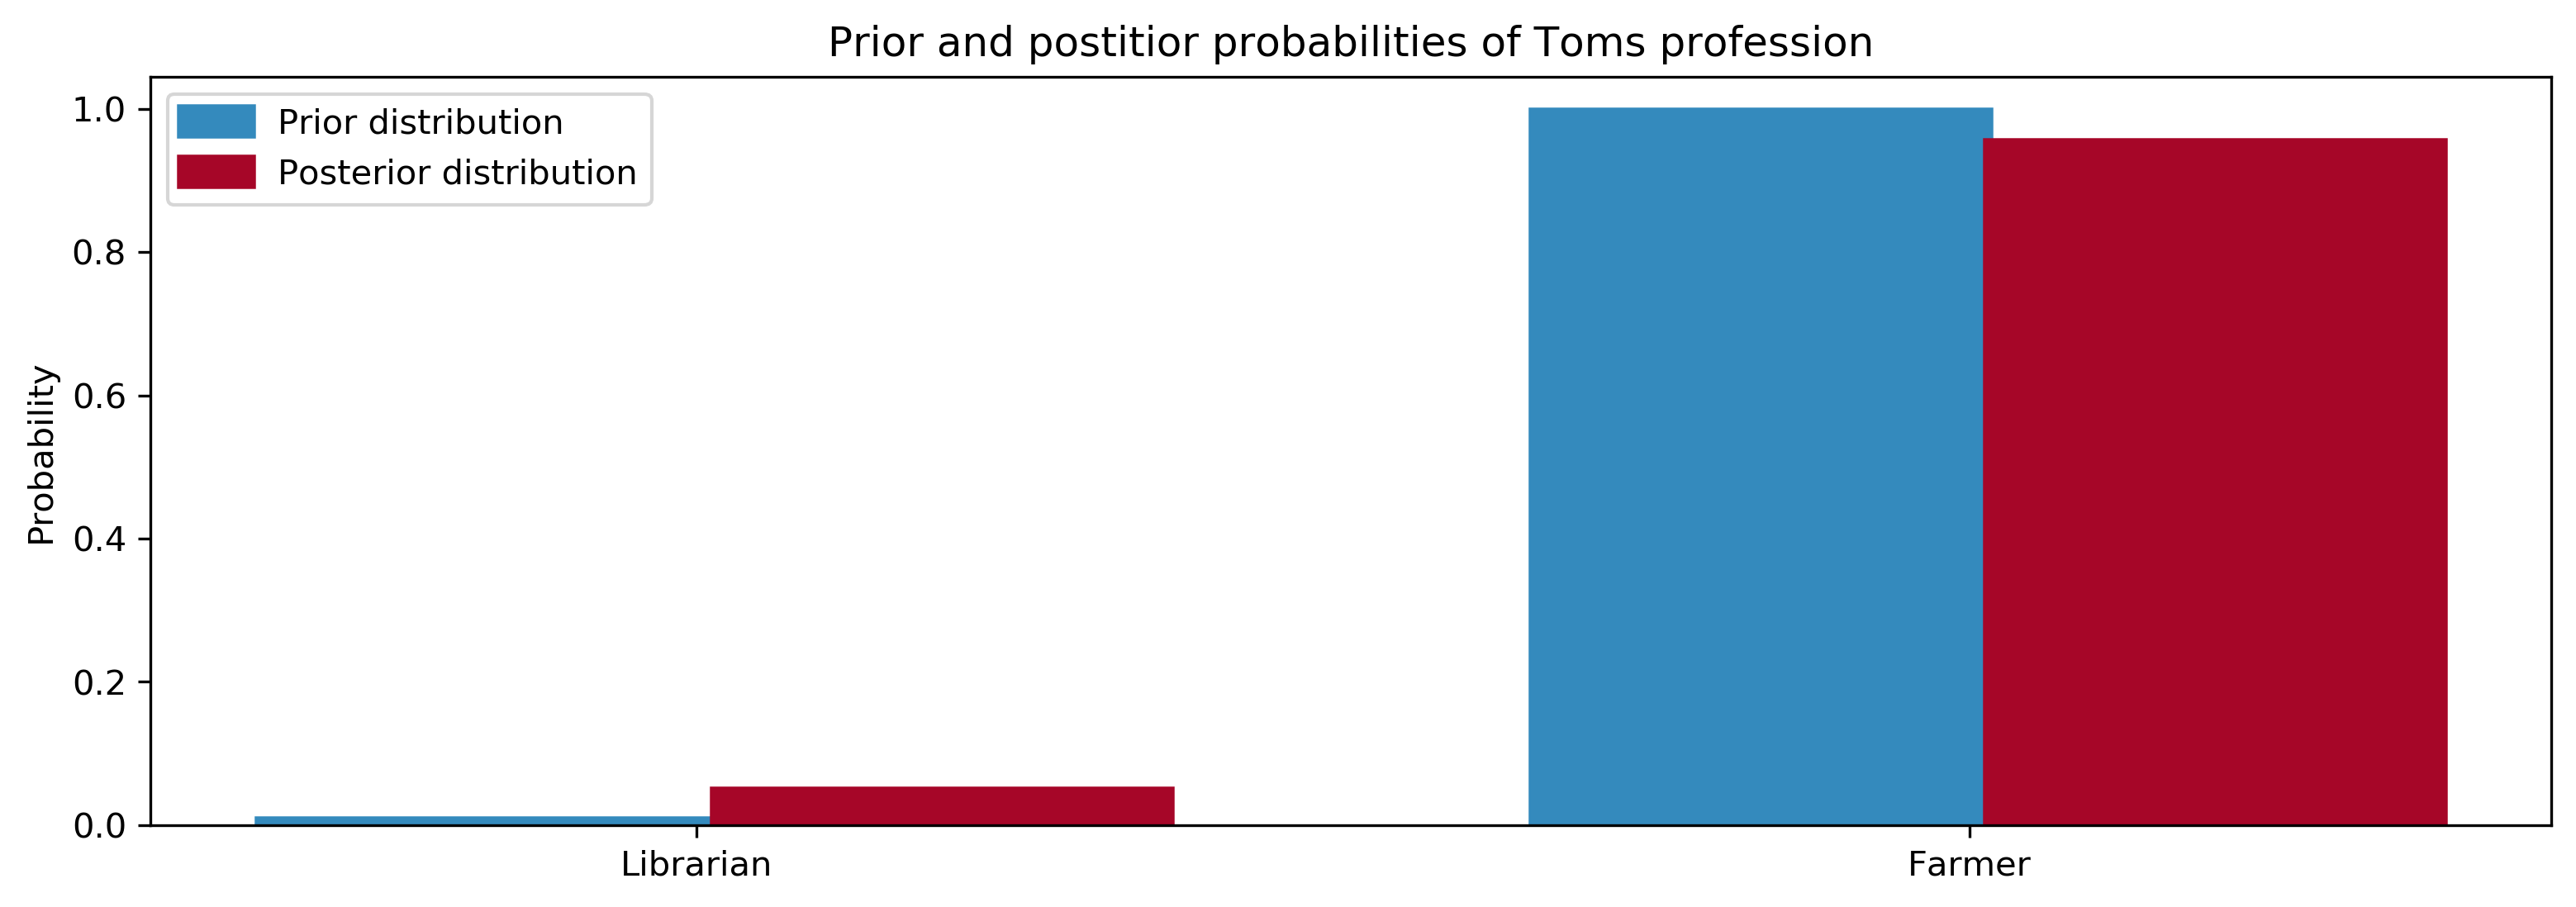

In [9]:
p_X_Tom_librarian=0.9999
p_X_Tom_farmer=0.1
proportion_farmers=200

prior_A=1/proportion_farmers
prior_not_A=1-prior_A
posterior_A_X=calc_tom_is_librarian(p_X_Tom_librarian, p_X_Tom_farmer, proportion_farmers)
posterior_not_A_X=1-posterior_A_X
plot_librarian(prior_A, prior_not_A,posterior_A_X, posterior_not_A_X)

But in that case if we have such big disproportion if farmers we can assume that some of them are looking after their tools, and our neihbor might know one of them.

\begin{align}
\rm{P(X|\overline{A})=0.5}\\
\rm{P(X|A)=0.95}
\end{align}

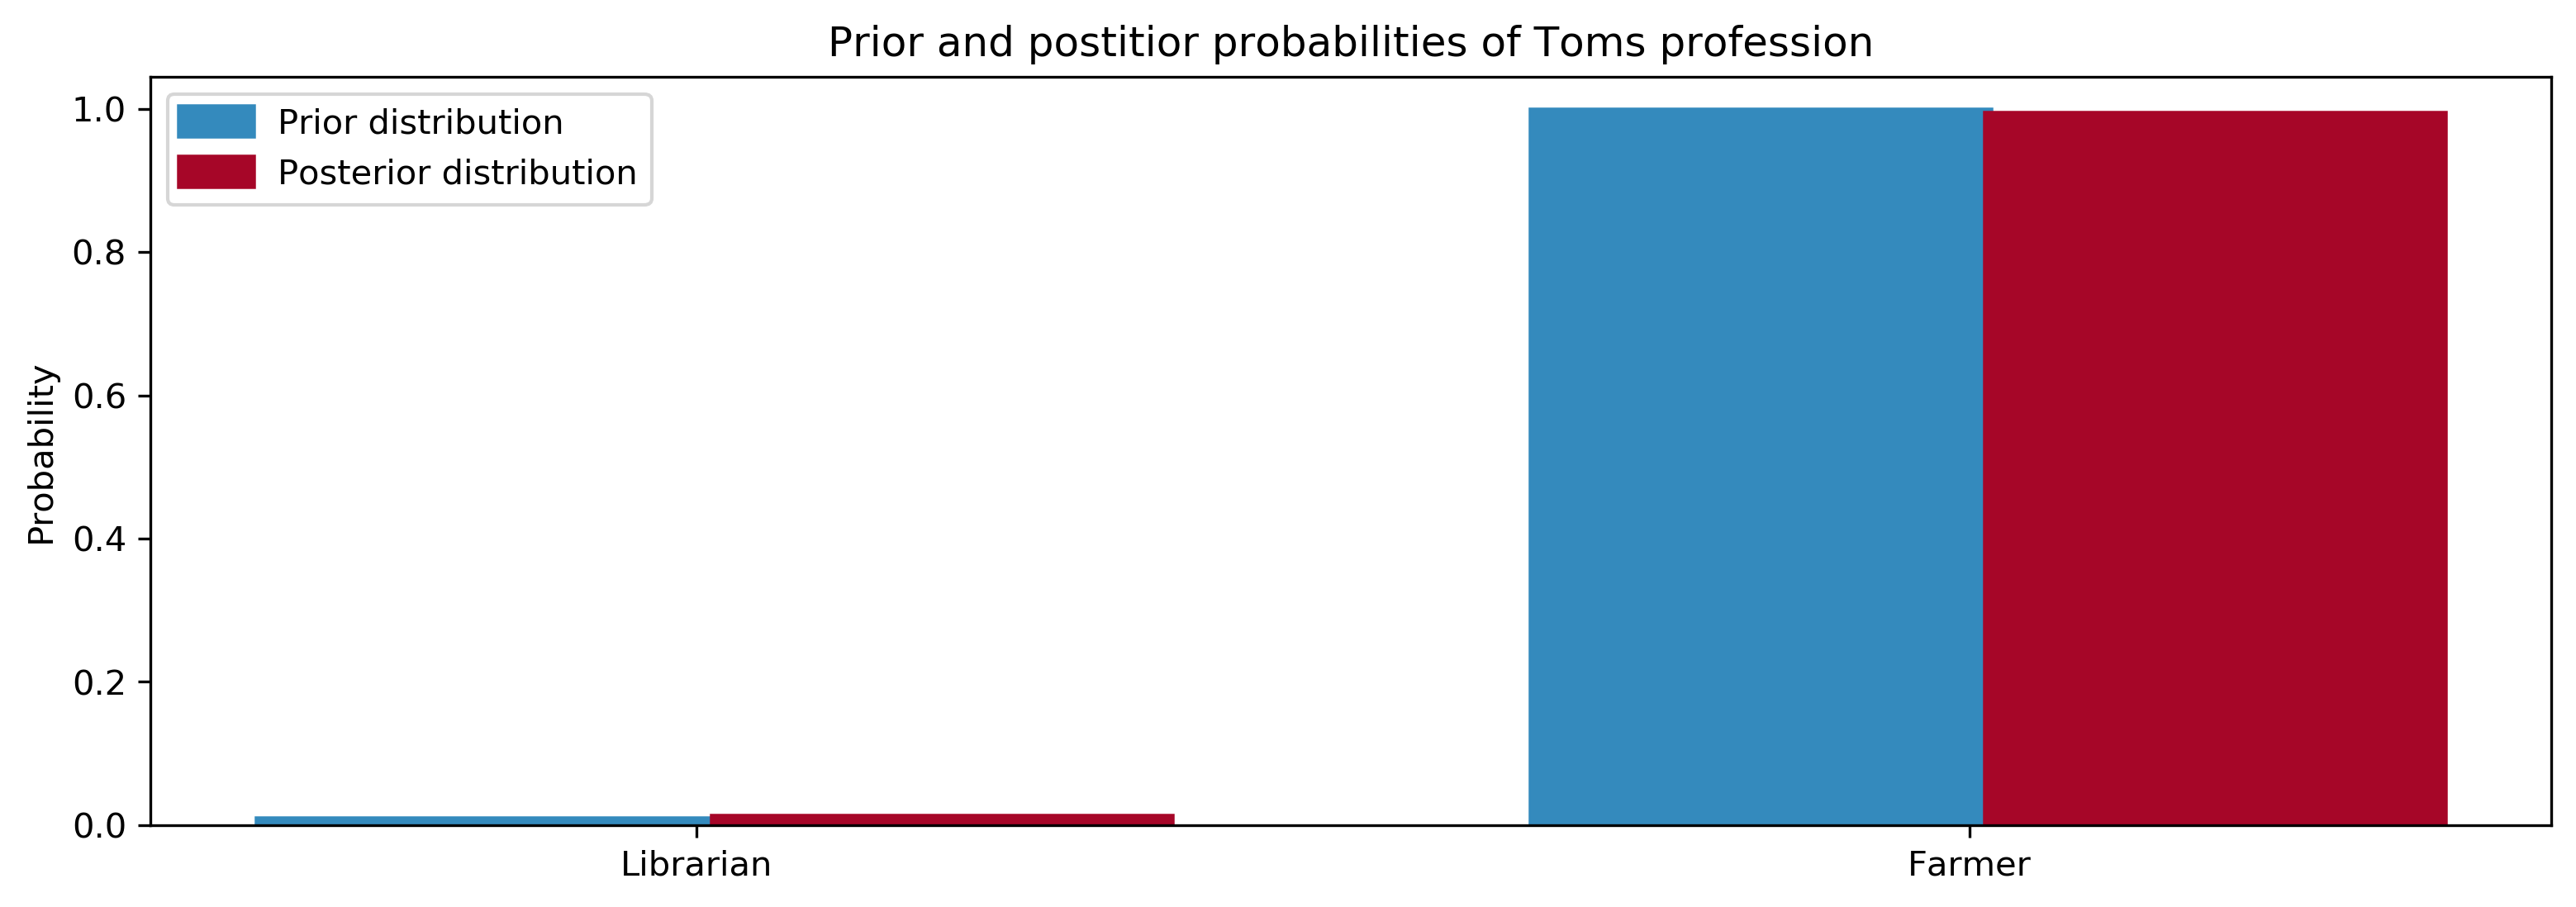

In [10]:
p_X_Tom_librarian=0.95
p_X_Tom_farmer=0.5
proportion_farmers=200

prior_A=1/proportion_farmers
prior_not_A=1-prior_A
posterior_A_X=calc_tom_is_librarian(p_X_Tom_librarian, p_X_Tom_farmer, proportion_farmers)
posterior_not_A_X=1-posterior_A_X
plot_librarian(prior_A, prior_not_A,posterior_A_X, posterior_not_A_X)

Nope - Tom is **Farmer** in that wolrd